# Lecture 3.1: Review

## Outline

* Basic git commands
* Summary statistics
* Exploratory plots
* Simple linear regression
* Probability
    * Union, intersection and complement
    * Conditional probability
    * Bayes' theorem
    * Counting methods

## Basic Git Commands

* Pushing to a remote repo
    * Add changes to your local repository: `git add <file you edited>`
    * Commit the changes: `git commit -m "a short message about the commit"`
    * Push the changes to your fork: `git push origin master`

* Syncing your local repo
    * Set the Zipfian repo as the upstream repo (you only need to do this once): `git remote add upstream <the Zipfian repo URL>` 
    * Fetch the Zipfian repo and immediately merge it into the local repo: `git pull upstream master`

* Or:
    * Fetch the upstream repo: `git fetch upstream`
    * Check out your local `master` branch (this step is not necessary if you didn't create any other branches besides the master branch): `git checkout master` 
    * Merge the changes from `upstream/master` into your local `master` branch: `git merge upstream/master`

## Summary Statistics

### Measure of Center/Location

* **Mean**: the arithmetic average of the data values
$$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n} = \frac{x_1 + x_2 + \ldots + x_n}{n} $$
    where n is the sample size.
* **Median**: the middle number when the data values are put in order
* **Mode**: the most frequently occurred value

* **Percentile**: the $p^{th}$ percentile - $p\%$ of the values in the data are less than or equal to this value ($0 \leq p \leq 100$)
* **Quartile**: 
    * $1^{st}$ quartile = $25^{th}$ percentile
    * $2^{nd}$ quartile = $50^{th}$ percentile = median
    * $3^{rd}$ quartile = $75^{th}$ percentile

In [1]:
x = [3, 5, 8, 1, 6, 9, 4, 2, 3, 11, 5, 13, 16, 8, 9]

In [2]:
# sample size
print("size:", len(x))

size: 15


In [3]:
# minimum value
print("min:", min(x))

min: 1


In [4]:
#maximum value
print("max:", max(x))

max: 16


In [5]:
# sort the values
sorted_x = sorted(x)
print(sorted_x)

[1, 2, 3, 3, 4, 5, 5, 6, 8, 8, 9, 9, 11, 13, 16]


In [6]:
# minimum value
print("first value:", sorted_x[0])

first value: 1


In [7]:
# maximum value
print("last value:", sorted_x[-1])

last value: 16


In [8]:
# calculate the mean

mean_x = float(sum(x)) / len(x)
print("the mean of x is:", mean_x)

the mean of x is: 6.866666666666666


In [9]:
# find the median

n = len(x)
midpoint = n // 2

if n % 2 == 1:
    median_x = sorted_x[midpoint]
else: 
    median_x = float((sorted_x[midpoint - 1] + sorted_x[midpoint]) / 2)
    
print("the median of x is:", median_x)

the median of x is: 6


### Measure of Spread/Variation

* **Variance**

$$ s^2_x = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2 $$

* **Standard deviation**

$$ s_x = \sqrt{\frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2} $$

* **Range** $= x_{maximum} - x_{minimum}$

* **Inter-quartile range (IQR)** $= Q_3 - Q_1$

In [10]:
# Calculate the variance of x
sum_of_squares = sum((x_i - mean_x) ** 2 for x_i in x)
var_x = sum_of_squares / (n - 1)
print("the variance of x is:", var_x)

the variance of x is: 18.123809523809523


### Measure of Shape

* **Skewness**: a measure of the asymmetry of a distribution
* **Kurtosis**: a measure of the "peakedness" of a distribution

### Measure of Association/Dependence (Bivariate)

* **Covariance**: 

$$ s_{xy} = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) $$

* **Correlation**

$$ r_{xy} = \frac{s_{xy}}{s_x s_y} $$

In [11]:
y = [31, 16, 17, 34, 50, 23, 12, 46, 22, 56, 34, 48, 25, 43, 32]

In [12]:
mean_y = float(sum(y)) / len(y)

In [13]:
# calculate the covariance of x and y

cov_xy = sum((x_i - mean_x)*(y_i - mean_y) for x_i, y_i in zip(x, y)) / (n - 1)
print("the covariance of x and y is:", cov_xy)

the covariance of x and y is: 10.014285714285714


## Exploratory Plots

### Example

You are shopping for a laptop computer at Best Buy. To help you with your decision, you collected data on a random sample of laptops on Best Buy’s Web site:

* Selling price
* Brand
* Screen size (in.)
* Hard drive size (GB)
* Amount of RAM memory (GB)
* Number of USB ports
* Weight (oz.) 

In [14]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [15]:
import pandas as pd
import yaml

from sqlalchemy import create_engine

pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']

engine = create_engine('postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds))

In [16]:
# Read in the data as a Pandas DataFrame

laptops = pd.read_sql_table('laptops', engine)
laptops.head()

,Price ($),Screen Size (in.),RAM Memory (GB),Hard drive (GB),USB Ports,Brand,Weight (oz.)
0,830,13.3,4,500,3,Toshiba,4.9
1,750,13.3,4,640,3,Toshiba,3.2
2,1200,11.6,2,128,2,Apple,2.3
3,1600,18.4,6,640,4,Toshiba,9.7
4,1900,18.4,8,500,4,Toshiba,9.7


In [17]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 7 columns):
Price ($)            63 non-null int64
Screen Size (in.)    63 non-null float64
RAM Memory (GB)      63 non-null int64
Hard drive (GB)      63 non-null int64
USB Ports            63 non-null int64
Brand                63 non-null object
Weight (oz.)         63 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 3.5+ KB


In [18]:
laptops.describe().T

,count,mean,std,min,25%,50%,75%,max
Price ($),63.0,957.857143,512.143436,300.0,550.00,800.0,1200.0,2500.0
Screen Size (in.),63.0,15.271429,1.582202,11.6,14.00,15.6,15.6,18.4
RAM Memory (GB),63.0,4.380952,1.528531,2.0,4.00,4.0,6.0,8.0
Hard drive (GB),63.0,506.888889,231.052788,64.0,320.00,500.0,640.0,1500.0
USB Ports,63.0,2.650794,0.699279,1.0,2.00,3.0,3.0,4.0
Weight (oz.),63.0,5.658730,1.468336,2.3,5.05,5.5,6.0,9.7


In [19]:
# change the column names to make them shorter

laptops.columns = ['price', 'screen_size', 'ram', 'hard_drive', 'usb', 'brand', 'weight']
laptops.head()

,price,screen_size,ram,hard_drive,usb,brand,weight
0,830,13.3,4,500,3,Toshiba,4.9
1,750,13.3,4,640,3,Toshiba,3.2
2,1200,11.6,2,128,2,Apple,2.3
3,1600,18.4,6,640,4,Toshiba,9.7
4,1900,18.4,8,500,4,Toshiba,9.7


### Histogram

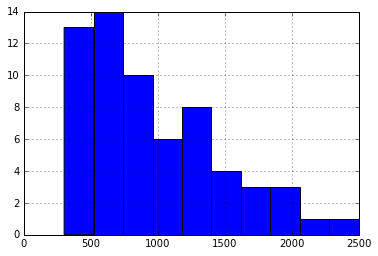

In [20]:
# plot a histogram of 'price'
laptops.price.hist();

### Boxplots

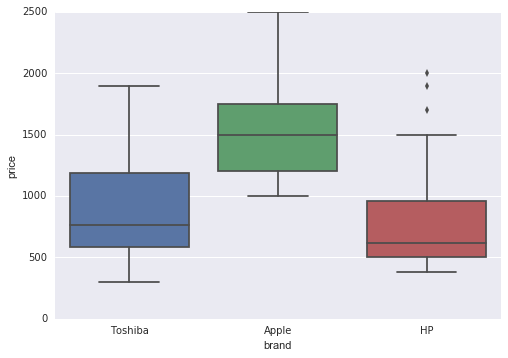

In [21]:
from seaborn import boxplot

boxplot('brand', 'price', data=laptops);

### Bar Plot

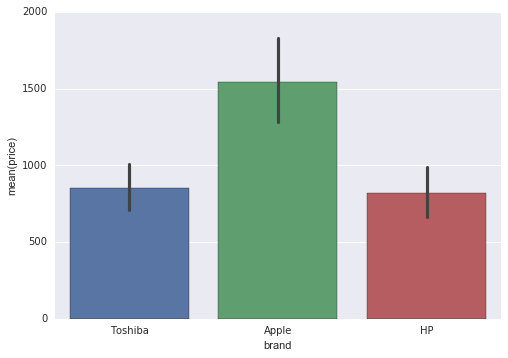

In [22]:
from seaborn import barplot

barplot('brand', 'price', data=laptops);

### Scatter Plot

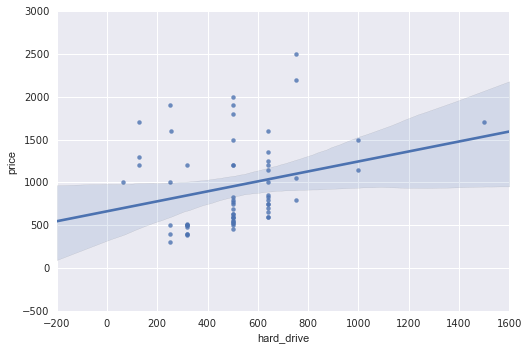

In [23]:
from seaborn import lmplot

lmplot(x='hard_drive', y='price', data=laptops, aspect=1.5);

## Simple Linear Regression

* Model assumption: y and x are linearly related
    * $y = \beta_0 + \beta_1 x + \varepsilon$ (simple linear regression)
    * where $y = \begin{bmatrix} y_1 \\y_2 \\ \vdots \\ y_n \end{bmatrix}$, 
    $x = \begin{bmatrix} x_1 \\x_2 \\ \vdots \\ x_n \end{bmatrix}$, 
    $\varepsilon = \begin{bmatrix} \varepsilon_1 \\ \varepsilon_2 \\ \vdots \\ \varepsilon_n \end{bmatrix}$

### Ordinary Least Squares

* Minimizes $\sum_{i=1}^n e_i^2$


* In the simple linear regression case,

    $\hat{\beta}_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$, or
    
    $\hat{\beta}_1 = r_{xy} \frac{s_y}{s_x}$, where $r_{xy}$ is the correlation between $x$ and $y$, $s_x$ and $s_y$ are the standard deviations of $x$ and $y$

    $\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$

## $R^2$

Some definitions:
* Total sum of squares (** SST **): $\sum_{i=1}^n (y_i - \bar{y})^2$


* Regression sum of squares (** SSR **): $\sum_{i=1}^n (\hat{y}_i - \bar{y})^2$


* Residual sum of squares (** SSE **): $\sum_{i=1}^n e_i^2$  



SST = SSR + SSE


$R^2 = \frac{SSR}{SST}$


In [24]:
import statsmodels.api as sm

X = laptops[['hard_drive']]
X = sm.add_constant(X)
X.head()

,const,hard_drive
0,1.0,500
1,1.0,640
2,1.0,128
3,1.0,640
4,1.0,500


In [25]:
y = laptops['price']
y.head()

0     830
1     750
2    1200
3    1600
4    1900
Name: price, dtype: int64

In [26]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     4.523
Date:                Mon, 11 Jul 2016   Prob (F-statistic):             0.0375
Time:                        15:17:46   Log-Likelihood:                -479.67
No. Observations:                  63   AIC:                             963.3
Df Residuals:                      61   BIC:                             967.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        662.6592    152.334      4.350      0.000     358.049     967.269
hard_drive     0.5824      0.274      2.127      0.037       0.035       1.130
==============================================================================
Omnibus:                       11.991   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.274
Skew:                           1.120   Prob(JB):                      0.00131
Kurtosis:                       3.196   Cond. No.                     1.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Interpretation

* **Intercept** - The mean value for $y$ when $x=0$

* **slope** - For each unit increase in $x$, the expected increase/decrease in $y$ (in the case of multiple linear regression, we need to add "holding all other explanatory variables constant", since there are more than one exaplanatory variable in the model.)

* $\textbf{R}^2$ - Proportion of the variation in $y$ that is explained by the model. Measured on a scale from 0 (bad) to 1 (good)

## Probability

### Axioms of Probability

* For any event A: $P(A) \geq 0$
* The probability of the entire sample space: $P(\Omega) = 1$
* For any countable collection $A_1, A_2,...$ of _mutually exclusive_ events:    
$$P(A_1\cup A_2 \cup \dots) = P(A_1) + P(A_2) + \dots$$

### Union, Intersection and Complement

* The ** union ** of two events $A$ and $B$, denoted $A \cup B$, is the set of outcomes that belong either to $A$, to $B$, or to both. In words,  $A \cup B$ means "A and/or B." 
* The ** intersection ** of two events $A$ and $B$, denoted $A \cap B$, is the set of outcomes that belong both to $A$ and to $B$. In words, $A \cap B$ means “A and B.”
* The ** complement ** of an event $A$, denoted $A^c$, is the set of outcomes that do not belong to $A$. In words, $A^c$ means "not A."


* The probability of event the "not A": $P(A^c) = 1 - P(A)$
* For any A and B (not necessarily disjoint):  

$$P(A \cup B) = P(A) + P(B) - P(A \cap B)$$

### Conditional Probability

The probability that event A occurs, given that event B has occurred

$$ P(A|B) = \frac{P(A\cap B)}{P(B)} $$

** Joint probability**: $P(A \cap B) = P(A|B) \times P(B)$

### Law of Total Probability

If $B_1, \dots, B_k$ partition $S$, then for any event A,

$$ P(A) = \sum_{i = 1}^k P(A \cap B_i) = \sum_{i = 1}^k P(A | B_i) P(B_i) $$

#### Simpson's Paradox

Are you better off with AntiCough?

<img src="images/anticough.png" width="600">

What happens if we combine the studies?

<img src="images/anticough2.png" width="500">

Overall, AntiCough has a 4% lower cure percentage (70%), despite being about 3% higher in both Study 1 and Study 2.

What's going on??

Let's translate the problem into statistical language. First, define the relevant events:
* $C = \{cured\}$
* $A = \{AntiCough\}$
* $A^c  = \{Other \ Medicine\}$
* $S_1 = \{Study \ 1\}$
* $S_2 = \{Study \ 2\}$

Then,

$$ P(C|A) = P(C \cap S_1 | A) + P(C \cap S_2 | A)
          = P(C | S_1 \cap A) P(S_1 | A) + P(C | S_2 \cap A) P(S_2 | A) $$  
          

$$ P(C|A^c) = P(C | S_1 \cap A^c) P(S_1 | A^c) + P(C | S_2 \cap A^c) P(S_2 | A^c) $$  

Although $P(C | S_1 \cap A) > P(C | S_1 \cap A^c)$ and $P(C | S_2 \cap A) > P(C | S_2 \cap A^c)$, the other terms can change the overall outcome: $P(S_1 | A)$, $P(S_2 | A)$, $P(S_1 | A^c)$, $P(S_2 | A^c)$.

### Independent Events

Events A and B are ** _independent_ ** if and only if: $$P(A \cap B) = P(A)P(B)$$

Equivalently,

$$ P(A|B) = P(A) $$
$$ P(B|A) = P(B) $$


**Are disjoint events independent?**

### Bayes' Theorem  


$$ P(A|B) = \frac{P(B|A) \times P(A)}{P(B)} = \frac{P(B|A) \times P(A)}{P(B|A) \times P(A) + P(B|A^c) \times P(A^c)} $$


#### Example

Mr Smith owns a hysterical rosebush. It will die with probability 1/2 if watered, and with probability 3/4 if
not watered. Worse still, Smith employs a perfidious gardener who will fail to water the rosebush with probability 2/3.  
Smith returns from holiday to find the rosebush.... DEAD!!!  
What is the probability that the gardener did not water it?

*Step 1*: formulate the events
* $D$ = {rosebush dies}
* $W$ = {gardener waters rosebush}
* $W^c$ = {gardener fails to water rosebush}

*Step 2*: write down all information given

$P(D | W) = 1/2$  
$P(D | W^c) = 3/4$  
$P(W^c) = 2/3$ (so $P(W) = 1 - P(W^c) = 1/3$)

*Step 3*: write down what we are looking for

$P(W^c | D)$

*Step 4*: compare this to what we know

Need to invert the conditioning, so use Bayes' Theorem:


$$P(W^c | D) = \frac{P(D | W^c)P(W^c)}{P(D | W^c)P(W^c) + P(D | W) P(W)} = \frac{3/4 \times 2/3}{3/4 \times 2/3 + 1/2 \times 1/3} = 3/4$$

So the gardener failed to water the rosebush with probability 3/4.

Now, let's try to solve this problem using probability trees...

### Chain Rule for Probability

We can write any joint probability as incremental product of conditional probabilities,

$ P(A_1 \cap A_2) = P(A_1)P(A_2 | A_1) $


$ P(A_1 \cap A_2 \cap A_3) = P(A_1)P(A_2 | A_1)P(A_3 | A_2 \cap A_1) $


In general, for $n$ events $A_1, A_2, \dots, A_n$, we have  

$ P (A_1 \cap A_2 \cap \dots \cap A_n) = P(A_1)P(A_2 | A_1) \dots P(A_n | A_{n-1} \cap \dots \cap A_1) $

#### Birthday Problem

(From last week's lab exercise) Suppose there are 23 people in a data science class, lined up in a single file line.  
Let $A_i$ be the probability that the $i^{th}$ person doesn't have the same birthday as the $j^{th}$ person for any $j < i$.  
Use the chain rule from probability to calculate the probability that at least 2 people share the same birthday. 



### Counting Methods

#### Permutation

The number of ways to select $k$ objects from $n$ distinct objects when different orderings constitute different choices 
$$^nP_k=n(n-1)(n-2)\dots(n-k+1) = \frac{n!}{(n-k)!}$$

#### Combination

If order doesn't matter...

The number of ways to choose $k$ objects out of $n$ distinguishable objects is 
$$ ^nC_k = \binom{n}{k} = \frac{^nP_k}{k!}=\frac{n!}{k!(n-k)!}$$

#### Example

A certain family has 6 children, consisting of 3 boys and 3 girls. Assuming that all birth orders are equally likely, what is the probability that the 3 eldest children are the 3 girls?